# DLton Project

## Team : Win_Win_(상생)

## 팀원 : 최현우(응), 김영진(응), 전다빈(응), 송민찬(하사비스)
## 구호 : 응하!
## 목표 : 딥러닝의 전체 Flow & 성능 향성 과정 배우고 협업을 목적으로 프로젝트를 수행

### Jellyfish_Classification
1. DATA
2. Model(pre-trained model)
* node 에서 task들에서 test 해본 결과, model 선정이 성능 향상에 가장 큰 영향 (3가지 이상 적용 예정)
* 해파리 사진이 비슷하여 자세하고 다양한 피처맵을 추출할 수 있는 모델 선정 예정
* 연산량으로 인해 Transfer Learning(pre-trained model) 활용 예정

## 모델 전이 학습
1) VGG16 - 작은 커널 활용. 세밀한 패턴 추출 (다빈,민찬 님)

2) ResNet50V2(tf_flowers),32,34 - 깊이가 깊은 모델(다양한 패턴), vanishing Gradient 해결 (영진 님)

3) Inception(GoogleNet) - 다양한 크기의 커널로 다양한 피처맵 추출 (현우 님)

4) 예외 모델 (MobileNet(다빈 님))

## 3. Evaluate
---

# 1. Data EDA

* 이미지 크기 분포 파악
* 라벨 분포 확인
* 픽셀 값 분포 분석
* 이상치 탐지(밝기-픽셀의 강도)
* 라벨 시각화
* 선명도 (Hand-Craft, sharped filter)
* 캐글 참조(라벨링)

In [1]:
!mkdir ~/aiffel/jellyfish
!pip install kaggle

mkdir: cannot create directory ‘/aiffel/aiffel/jellyfish’: File exists


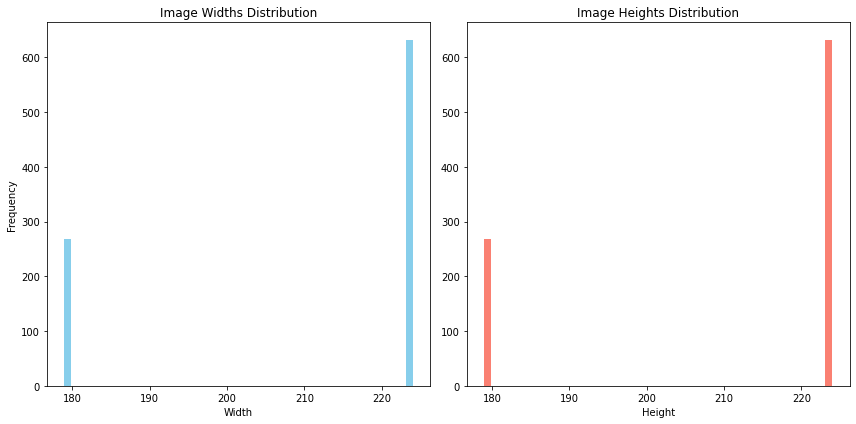

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Train 데이터셋이 있는 경로로 가정합니다. 실제 경로로 변경해 주세요.
train_data_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train'

# 이미지 크기를 저장할 리스트
image_sizes = []

# Train 데이터셋 안의 모든 해파리 종류의 폴더에 대해 반복
for jellyfish_type in os.listdir(train_data_dir):
    jellyfish_type_path = os.path.join(train_data_dir, jellyfish_type)
    # 각 해파리 종류 폴더 안의 이미지 파일들에 대해 반복
    for image_file in os.listdir(jellyfish_type_path):
        image_path = os.path.join(jellyfish_type_path, image_file)
        # 이미지를 열고 크기 정보를 가져옵니다.
        with Image.open(image_path) as img:
            image_sizes.append(img.size)

# 이미지 크기 분포를 분석하여 시각화합니다.
widths, heights = zip(*image_sizes)

plt.figure(figsize=(12, 6))

# 가로 크기 분포를 히스토그램으로 표시합니다.
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='skyblue')
plt.title('Image Widths Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# 세로 크기 분포를 히스토그램으로 표시합니다.
plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='salmon')
plt.title('Image Heights Distribution')
plt.xlabel('Height')

plt.tight_layout()
plt.show()


In [3]:
from collections import Counter

# 이미지 크기 데이터로부터 고유한 크기와 각 크기의 출현 횟수를 계산
size_counts = Counter(image_sizes)

# 고유한 크기와 출현 횟수를 출력
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

Size: (179, 179), Count: 268
Size: (224, 224), Count: 632


In [4]:
# 모든 데이터 분포와 크기 확인하기
import os
from PIL import Image
from collections import Counter

# 데이터셋이 있는 기본 경로
base_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid'

# 이미지 크기를 저장할 리스트
all_image_sizes = []

# Train, Validation, Test 폴더에 대해 반복
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        for image_file in os.listdir(jellyfish_type_path):
            image_path = os.path.join(jellyfish_type_path, image_file)
            with Image.open(image_path) as img:
                all_image_sizes.append(img.size)

# 고유한 크기와 출현 횟수를 계산
size_counts = Counter(all_image_sizes)

# 고유한 크기와 출현 횟수를 출력
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")


Size: (179, 179), Count: 268
Size: (224, 224), Count: 711


In [5]:
# dir 확인까지 함수 처리
import os
from PIL import Image
from collections import defaultdict

def get_image_sizes(base_dir):
    all_image_sizes = defaultdict(list)

    # Train, Validation, Test 폴더에 대해 반복
    for dataset_type in ['Train', 'valid', 'test']:
        dataset_path = os.path.join(base_dir, dataset_type)
        for jellyfish_type in os.listdir(dataset_path):
            jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
            for image_file in os.listdir(jellyfish_type_path):
                image_path = os.path.join(jellyfish_type_path, image_file)
                with Image.open(image_path) as img:
                    all_image_sizes[img.size].append(image_path)

    return all_image_sizes

base_dir = '/aiffel/aiffel/jellyfish/Train_Test_Valid'
image_sizes = get_image_sizes(base_dir)
for size, paths in image_sizes.items():
    print(f"Size: {size}, Paths: {paths[:5]}")
    print()
    
# 각 경로마다 전부 섞여 있음 확인


Size: (179, 179), Paths: ['/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-21-25.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-32-39.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-6-08.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-70-16.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-57-01.JPG']

Size: (224, 224), Paths: ['/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-9-12.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/01.JPG', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-44-58.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-56-72.jpg', '/aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-82-31.jpg']



In [6]:
# 라벨 분포 확인
from collections import Counter

# 라벨 분포를 저장할 카운터
label_counts = Counter()

# Train, Validation, Test 폴더에 대해 반복
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    # 각 해파리 종류 폴더를 순회
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        # 각 폴더의 이미지 개수를 카운트하여 라벨 분포에 추가
        num_images = len([name for name in os.listdir(jellyfish_type_path) if os.path.isfile(os.path.join(jellyfish_type_path, name))])
        label_counts[jellyfish_type] += num_images

# 라벨 분포 출력
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: compass_jellyfish, Count: 164
Label: mauve_stinger_jellyfish, Count: 164
Label: blue_jellyfish, Count: 164
Label: barrel_jellyfish, Count: 160
Label: Moon_jellyfish, Count: 162
Label: lions_mane_jellyfish, Count: 165


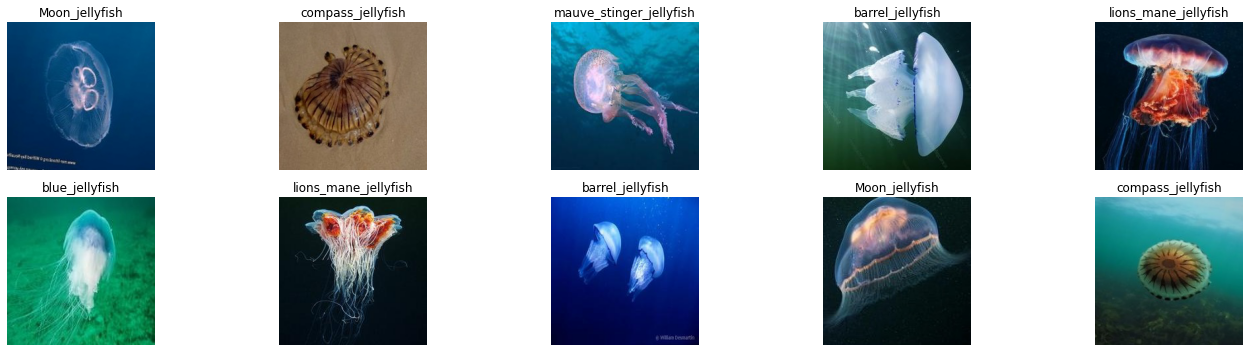

In [7]:
import random
# 라벨링 시각화 

def visualize_random_sample_images(base_dir, num_images=10):
    plt.figure(figsize=(20, 5))  # 너비는 20인치, 높이는 2인치로 설정합니다.
    
    # 모든 이미지 파일 경로를 저장할 리스트
    image_paths = []
    
    # 모든 클래스 폴더를 순회합니다.
    for class_name in os.listdir(os.path.join(base_dir, 'Train')):
        class_dir = os.path.join(base_dir, 'Train', class_name)
        # 해당 클래스의 모든 이미지 파일 경로를 리스트에 추가합니다.
        image_paths.extend([os.path.join(class_dir, file) for file in os.listdir(class_dir)])
    
    # 무작위로 이미지 파일 경로를 선택합니다.
    random_sample_paths = random.sample(image_paths, num_images)
    
    # 선택된 이미지 파일을 시각화합니다.
    for idx, image_path in enumerate(random_sample_paths):
        # 이미지를 불러옵니다.
        img = Image.open(image_path)
        # 이미지를 서브플롯에 그립니다.
        plt.subplot(2, num_images//2, idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(os.path.dirname(image_path)))
    
    plt.tight_layout()
    plt.show()

# 함수를 호출하여 무작위로 선택된 10개의 이미지를 시각화합니다.
visualize_random_sample_images(base_dir)

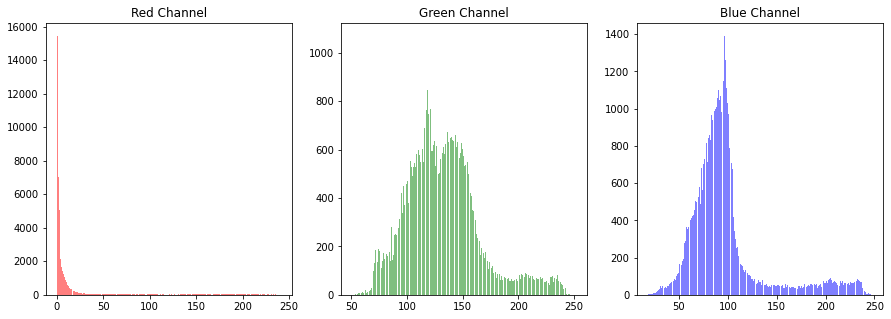

In [8]:
# 픽셀 값 분포 분석
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_image_pixel_distribution(image_path):
    # 이미지를 로드하고 RGB 값을 얻습니다.
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        pixels = np.array(img)
        
    # RGB 채널을 분리합니다.
    r, g, b = pixels[:,:,0], pixels[:,:,1], pixels[:,:,2]
    
    # 각 채널에 대한 히스토그램을 생성합니다.
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].hist(r.flatten(), bins=256, color='red', alpha=0.5)
    ax[0].set_title('Red Channel')
    
    ax[1].hist(g.flatten(), bins=256, color='green', alpha=0.5)
    ax[1].set_title('Green Channel')
    
    ax[2].hist(b.flatten(), bins=256, color='blue', alpha=0.5)
    ax[2].set_title('Blue Channel')
    
    plt.show()

# 예시 이미지의 경로
example_image_path = base_dir + '/Train/blue_jellyfish/17.jpg'

# 픽셀 값 분포를 시각화합니다.
plot_image_pixel_distribution(example_image_path)

# 대체적으로 Blue 계열이 많음 확인, Green도 많음 (바다 배경 색이 많음)
# 파일 15개 확인

In [9]:
# 이상치 탐지 (Outlier : 전반적 패턴에서 벗어나는 관측값)
# 라벨 잘못 지정
# 이미지 손상
# 특이한 이미지
import numpy as np
from PIL import Image
import os

# 이미지 픽셀 강도의 평균과 표준편차를 저장할 리스트
intensity_stats = []

# 이미지 데이터셋을 순회하며 픽셀 강도의 평균과 표준편차를 계산
for dataset_type in ['Train', 'valid', 'test']:
    dataset_path = os.path.join(base_dir, dataset_type)
    for jellyfish_type in os.listdir(dataset_path):
        jellyfish_type_path = os.path.join(dataset_path, jellyfish_type)
        for image_file in os.listdir(jellyfish_type_path):
            image_path = os.path.join(jellyfish_type_path, image_file)
            if os.path.isfile(image_path):  # 파일인지 확인
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    avg_intensity = np.mean(img_array)
                    std_intensity = np.std(img_array)
                    intensity_stats.append((image_path, avg_intensity, std_intensity))

# 이상치로 판단
# 평균의 두 배를 넘는 밝기를 이상치로 설정
avg_threshold = np.mean([stat[1] for stat in intensity_stats]) * 2 
 # 표준편차의 두 배를 넘는 변동을 이상치로 설정
std_threshold = np.mean([stat[2] for stat in intensity_stats]) * 2 

# 이상치로 의심되는 이미지 출력
outliers = [(path, avg, std) for path, avg, std in intensity_stats if avg > avg_threshold or std > std_threshold]
for outlier in outliers:
    print(f"Outlier detected: {outlier[0]}")
    print(f"Average Intensity: {outlier[1]}")
    print(f"Intensity StdDev: {outlier[2]}")
    print()
# 이상치가 너무 많음 확인

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/compass_jellyfish/aug-61-06.jpg
Average Intensity: 180.62722761461876
Intensity StdDev: 36.37232842824252

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/mauve_stinger_jellyfish/52.jpg
Average Intensity: 181.17682424532313
Intensity StdDev: 59.181554417947204

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/mauve_stinger_jellyfish/aug-27-35.JPG
Average Intensity: 181.03647410089155
Intensity StdDev: 49.07242897596128

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/mauve_stinger_jellyfish/aug-55-68.jpg
Average Intensity: 187.9115446960034
Intensity StdDev: 44.15528983771726

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/mauve_stinger_jellyfish/68.jpg
Average Intensity: 186.656037414966
Intensity StdDev: 47.56063746953782

Outlier detected: /aiffel/aiffel/jellyfish/Train_Test_Valid/Train/blue_jellyfish/aug-70-25.jpg
Average Intensity: 217.394312021

# 2. Data Preprocessing

* 이상치가 너무 많음 (픽셀/밝기) - 제거하거나 Data Augmentation 진행

* 바다 배경이라 Blue 계열 색상이 많음 - 색상 분포 균일화 (바다 색 영향을 줄이려고 했으나, 해당 색의 해파리 특징을 놓칠까봐 우선 생략)

* 사이즈가 (179,179) (224,224)로 다름 - 한가지 크기로 resize

* 선명도 높이기

In [10]:
# 이상치 조정, 리사이즈 및 색상 분포 균일화, 전처리 과정 총 함수
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
from PIL import ImageEnhance
import numpy as np

def preprocess_image(image):
    # 이미지 데이터 타입을 uint8로 변환 (GoogleNet input shape 맞추기 위해)
    image = np.uint8(image)
    
    # PIL 이미지로 변환
    image = Image.fromarray(image)
    
    # 이상치 조정: 밝기
    enhancer = ImageEnhance.Brightness(image)
    target_brightness = 100  # 조정하려는 목표 밝기 (이상치 2배 설정 최소 177)
    # enhance(스케일 벡터, 인수로 1,0을 기준으로 밝기 조절, 목표밝기/기본 밝기 평균)
    image = enhancer.enhance(target_brightness / np.mean(image))
    
    # resize
    image = image.resize(output_size, Image.ANTIALIAS)
    
    # 색상 분포 균일화: 히스토그램 평활화, 우선 보류!했다가 투입!배제!
    image = ImageOps.equalize(image)

    return np.array(image)

# 원하는 출력 이미지 크기
output_size = (224, 224)

# 데이터 제너레이터 생성
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # 전처리 함수 지정
    
    # Data Augmentation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 훈련 데이터셋에 대한 데이터 제너레이터 생성
train_generator = datagen.flow_from_directory(
    directory=base_dir + '/Train',
    target_size=output_size,
    batch_size=4,           # 배치 크기 변경해보면서 테스트!
    class_mode='categorical' # 자동 원핫 인코딩 변환(연산이 너무 많아지면 바꿔보자!)
)

# 검증 데이터셋에 대한 데이터 제너레이터 생성
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
valid_generator = valid_datagen.flow_from_directory(
    directory=base_dir + '/valid',  # 검증 데이터셋 경로
    target_size=output_size,
    batch_size=1,
    class_mode='categorical'
)

# 테스트 데이터셋에 대한 데이터 제너레이터 생성
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
test_generator = test_datagen.flow_from_directory(
    directory=base_dir + '/test',
    target_size=output_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # 평가 시에는 데이터를 섞지 않음
)


Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


# 3. Model

* Transfer Learning (pre-trained model : GoogleNet, InceptionV3)

* 2번. MobileNet - 다빈님이 검색해서 찾아온 모델 (제한 된 리소스에서 간단히 사용)

* 3번. VGG16

* 4번. ResNet50V2 - tf_flowers (데이터 많음) 에서 해봄

In [11]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.metrics import Precision, Recall
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.callbacks import EarlyStopping
# import math

# # 사전 훈련된 InceptionV3 모델을 로드합니다. include_top=False로 설정하여 완전 연결 분류기를 제외합니다.
# base_model = InceptionV3(weights='imagenet', include_top=False)

# # 특징 추출 부분 위에 새로운 레이어를 추가합니다.
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(16, activation='relu')(x)
# x = BatchNormalization()(x)
# predictions = Dense(6, activation='softmax')(x)

# # 새로운 모델을 생성합니다.
# model = Model(inputs=base_model.input, outputs=predictions)

# # 사전 훈련된 레이어의 가중치를 고정하고, 새로 추가한 레이어만 훈련하도록 설정합니다.
# # Fine_Tune
# # 모델의 모든 레이어를 기본적으로 학습 불가능하게 설정
# for layer in base_model.layers[:15]:
#     layer.trainable = False

# # 상위 10개 레이어만 학습 가능하게 설정
# for layer in base_model.layers[15:]:
#     layer.trainable = True
    
# # 모델 요약
# model.summary()

# # LrS & Earlystopping
# # 학습률을 조정하는 함수 정의
# def scheduler(epoch, lr):
#     if epoch%6==0:
#         return lr
#     else:
#         return lr * math.exp(-0.1)

# # 콜백 생성
# lr_scheduler = LearningRateScheduler(scheduler)

# # 조기 종료 콜백 생성
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [12]:
# 사전 훈련된 MobileNetV3 모델을 로드합니다.
from tensorflow.keras.applications import MobileNetV3Small  # 또는 MobileNetV3Large
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
import math

# include_top=False로 설정하여 네트워크 최상단의 완전 연결 레이어를 제외합니다.
base_model = MobileNetV3Small(weights='imagenet', include_top=False)

# 특징 추출 부분 위에 새로운 레이어를 추가합니다.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# 새로운 모델을 생성합니다.
model = Model(inputs=base_model.input, outputs=predictions)

# 사전 훈련된 레이어의 가중치를 고정하고, 새로 추가한 레이어만 훈련하도록 설정합니다.
# Fine_Tune
# 모델의 모든 레이어를 기본적으로 학습 불가능하게 설정
for layer in base_model.layers[:16]:
    layer.trainable = False

# 상위 15개 레이어만 학습 가능하게 설정
for layer in base_model.layers[16:]:
    layer.trainable = True
    
# 모델 요약
model.summary()

# LrS & Earlystopping
# 학습률을 조정하는 함수 정의
def scheduler(epoch, lr):
    if epoch%6==0:
        return lr
    else:
        return lr * math.exp(-0.05)

# 콜백 생성
lr_scheduler = LearningRateScheduler(scheduler,verbose=1)

# 조기 종료 콜백 생성
early_stopping = EarlyStopping(monitor='val_loss', patience=5)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, None, None, 1 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, None, None, 1 64          Conv[0][0]                       
______________________________________________________________________________________________

In [13]:
# Layers position Check, False가 pre-trained model weight load
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 Conv False
3 Conv/BatchNorm False
4 tf.__operators__.add False
5 re_lu False
6 tf.math.multiply False
7 multiply False
8 expanded_conv/depthwise/pad False
9 expanded_conv/depthwise False
10 expanded_conv/depthwise/BatchNorm False
11 re_lu_1 False
12 expanded_conv/squeeze_excite/AvgPool False
13 expanded_conv/squeeze_excite/Conv False
14 expanded_conv/squeeze_excite/Relu False
15 expanded_conv/squeeze_excite/Conv_1 False
16 tf.__operators__.add_1 True
17 re_lu_2 True
18 tf.math.multiply_1 True
19 expanded_conv/squeeze_excite/Mul True
20 expanded_conv/project True
21 expanded_conv/project/BatchNorm True
22 expanded_conv_1/expand True
23 expanded_conv_1/expand/BatchNorm True
24 re_lu_3 True
25 expanded_conv_1/depthwise/pad True
26 expanded_conv_1/depthwise True
27 expanded_conv_1/depthwise/BatchNorm True
28 re_lu_4 True
29 expanded_conv_1/project True
30 expanded_conv_1/project/BatchNorm True
31 expanded_conv_2/expand True
32 expanded_conv_2/expand/Batc

In [14]:
# # tf_flowers에서 사용한 ResNet50V2 활용
# # 데이터 수가 적어서 tf_flowers 만큼의 성능은 안 나옴.

# from tensorflow.keras.applications import ResNet50V2
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.metrics import Precision, Recall
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.callbacks import EarlyStopping
# import math
# # 사전 훈련된 ResNet50V2 모델 로드, include_top=False로 분류기 부분 제외
# base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # 모델의 모든 레이어를 고정하여 사전 훈련된 가중치가 업데이트되지 않도록 설정
# # 이 부분은 선택적으로 일부 레이어의 가중치를 해제하여 미세조정을 할 수 있습니다.
# for layer in base_model.layers[:-10]:
#     layer.trainable = False
# for layer in base_model.layers[-10:]:
#     layer.trainable = True
    
# # 사전 훈련된 모델 위에 새로운 레이어를 쌓아서 모델을 재구성
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(32, activation='relu')(x)
# predictions = Dense(6, activation='softmax')(x)  # 예시로 6개의 출력을 가정

# # 새로운 모델 객체를 생성
# model = Model(inputs=base_model.input, outputs=predictions)

# # Fine-tuning 설정 (상위 레이어 10개 재학습)
# for layer in base_model.layers:
#     layer.trainable = True
# # for layer in base_model.layers[-10:]:
# #     layer.trainable = True
    
# # 모델 요약
# model.summary()

# # LrS & Earlystopping
# # 학습률을 조정하는 함수 정의
# def scheduler(epoch, lr):
#     if epoch%5==0:
#         return lr
#     else:
#         return lr * math.exp(-0.2)

# # 콜백 생성
# lr_scheduler = LearningRateScheduler(scheduler)

# # 조기 종료 콜백 생성
# early_stopping = EarlyStopping(monitor='val_loss', patience=7)

# # 모델 요약 출력
# model.summary()

In [15]:
# # 사전 훈련된 VGG16 모델
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.metrics import Precision, Recall
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.callbacks import EarlyStopping
# import math
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import Dense, Flatten, Dropout

# # 사전 훈련된 VGG16 모델 로드, include_top=False로 분류기 부분 제외
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # 모델의 모든 레이어를 고정하여 사전 훈련된 가중치가 업데이트되지 않도록 설정
# # Fine-tuning 설정 (상위 레이어 10개 재학습)
# for layer in base_model.layers:
#     layer.trainable = False
# # for layer in base_model.layers[-10:]:
# #     layer.trainable = True

# # 사전 훈련된 모델 위에 새로운 레이어를 쌓아서 모델을 재구성
# x = base_model.output
# x = Flatten()(x)  # 특성 맵을 1차원 벡터로 변환
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)  # 드롭아웃 추가 (옵션)
# x = Dense(16, activation='relu')(x)
# x = BatchNormalization()(x)
# predictions = Dense(6, activation='softmax')(x)  # 최종 분류기

# # 새로운 모델 객체를 생성
# model = Model(inputs=base_model.input, outputs=predictions)

# # 모델 요약 출력
# model.summary()

# # LrS & Earlystopping
# # 학습률을 조정하는 함수 정의
# def scheduler(epoch, lr):
#     if epoch%20==0:
#         return lr
#     else:
#         return lr * math.exp(-0.2)

# # 콜백 생성
# lr_scheduler = LearningRateScheduler(scheduler)

# # 조기 종료 콜백 생성
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [16]:
# model compile
model.compile(optimizer=Adam(learning_rate=0.00018), 
              loss='categorical_crossentropy', 
              metrics=['accuracy',Precision(), Recall()])


In [17]:
# 첫 번째 배치 데이터를 가져옵니다.
images, labels = next(iter(train_generator))

# 가져온 이미지의 형태와 타입을 출력합니다.
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")


Images batch shape: (4, 224, 224, 3)
Labels batch shape: (4, 6)


In [18]:
# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.00018000000272877514.
225/225 [==============================] - 22s 64ms/step - loss: 1.3981 - accuracy: 0.4633 - precision: 0.7615 - recall: 0.1844 - val_loss: 1.3144 - val_accuracy: 0.4872 - val_precision: 0.4375 - val_recall: 0.3590
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.00017122129900581974.
225/225 [==============================] - 13s 58ms/step - loss: 0.8375 - accuracy: 0.7211 - precision: 0.7907 - recall: 0.6256 - val_loss: 1.4180 - val_accuracy: 0.5385 - val_precision: 0.5294 - val_recall: 0.4615
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.00016287073669487193.
225/225 [==============================] - 13s 58ms/step - loss: 0.6271 - accuracy: 0.7733 - precision: 0.8395 - recall: 0.7033 - val_loss: 1.1110 - val_accuracy: 0.7436 - val_precision: 0.8000 - val_recall: 0.7179
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rat

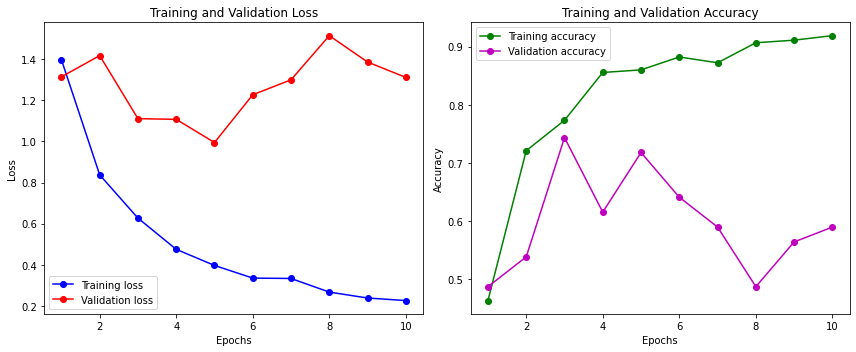

In [19]:
import matplotlib.pyplot as plt

# Extract loss, accuracy, and validation loss and accuracy from history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create epochs range
epochs = range(1, len(loss) + 1)

# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'go-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'mo-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# 모델 평가
test_model = model.evaluate(test_generator)
print("Test :", test_model)

40/40 [==============================] - 0s 10ms/step - loss: 0.4595 - accuracy: 0.9250 - precision: 0.9250 - recall: 0.9250
Test : [0.4594600200653076, 0.925000011920929, 0.925000011920929, 0.925000011920929]


In [29]:
# 모델의 가중치를 저장 (추후에 테스트 시 어느정도 성능 나오면 저장)
model.save(base_dir+'/model_best_MobileNet.h5')
# test2 fit 2번 했더니 test4(그냥 성능 향상..뭘까?)

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


# 4. W&B 훈련 과정 시각화

* Run > Sweep > Project

In [30]:
!pip install wandb==0.16.0

In [32]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder
from PIL import Image 
import glob
import os

In [33]:
wandb.login(key = '0c4807d8a147952a1a246bd628d4b96760e0eb40')

wandb: Currently logged in as: hyunwoo220 (win_win_). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

In [34]:
# W&B Start! 신세계다..
# 1. Sweep 설정

sweep_config = {
    "name": "sweep_test_core",
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate": {
            "min": 0.000016,
            "max": 0.000019
        },
        "epoch": {
            "distribution": "int_uniform",
            "min": 8,
            "max": 20
        }
    }
}


In [36]:
# 2. Train function

import wandb
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from wandb.keras import WandbCallback

def train():
    # Wandb 초기화
    wandb.init()
    config = wandb.config

    # MobileNet 모델 로드
    base_model = MobileNetV3Small(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(32, activation='relu')(x)  # 새로운 상위 레이어
    predictions = Dense(6, activation='softmax')(x)  # 클래스 수에 맞게 조정하세요

    model = Model(inputs=base_model.input, outputs=predictions)

    # Fine_Tune
    # 모델의 모든 레이어를 기본적으로 학습 불가능하게 설정
    for layer in base_model.layers[:16]:
        layer.trainable = False

    # 상위 10개 레이어만 학습 가능하게 설정
    for layer in base_model.layers[16:]:
        layer.trainable = True
   
    
#     # 상위 레이어만 학습 가능하게 설정
#     for layer in base_model.layers:
#         layer.trainable = False

    # 학습률 조정 함수
    def scheduler(epoch, lr):
        if epoch % 6 == 0:
            return lr
        else:
            return lr * math.exp(-0.05)

    # 콜백 생성
    lr_scheduler = LearningRateScheduler(scheduler, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # 모델 컴파일
    model.compile(optimizer=Adam(learning_rate=config.learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(), Recall()])

    # 모델 훈련
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=config.epoch, # SWeep config의 파라미터들 참조해야 함
        validation_data=valid_generator,
        validation_steps=valid_generator.samples // valid_generator.batch_size,
        callbacks=[lr_scheduler, early_stopping, WandbCallback()]
    )
    # 모델 평가 후 반환된 메트릭들을 unpacking
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)

    # 결과 로그에 정밀도와 재현율 추가
    wandb.log({
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall
        })


In [37]:
# Sweep 설정
sweep_id = wandb.sweep(sweep_config, entity="hyunwoo220", project="Jellyfish_classification")

# Sweep 실행
wandb.agent(sweep_id, train, count=3)

Create sweep with ID: sw5cqd04
Sweep URL: https://wandb.ai/hyunwoo220/Jellyfish_classification/sweeps/sw5cqd04


wandb: Agent Starting Run: v6ab09sl with config:
wandb: 	epoch: 17
wandb: 	learning_rate: 1.86273294049315e-05
wandb: Currently logged in as: hyunwoo220. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/17

Epoch 00001: LearningRateScheduler setting learning rate to 1.8627330064191483e-05.
225/225 [==============================] - 19s 64ms/step - loss: 1.7898 - accuracy: 0.2067 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8429 - val_accuracy: 0.1538 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 2/17

Epoch 00002: LearningRateScheduler setting learning rate to 1.7718864456945712e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.6216 - accuracy: 0.3622 - precision: 1.0000 - recall: 0.0067 - val_loss: 1.7053 - val_accuracy: 0.1538 - val_precision: 0.5000 - val_recall: 0.0256
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 3/17

Epoch 00003: LearningRateScheduler setting learning rate to 1.6854705671545627e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.4344 - accuracy: 0.5089 - precision: 0.9318 - recall: 0.0456 - val_loss: 1.5440 - val_accuracy: 0.3333 - val_precision: 0.4000 - val_recall: 0.0513
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 4/17

Epoch 00004: LearningRateScheduler setting learning rate to 1.603269122460866e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.3020 - accuracy: 0.5767 - precision: 0.8438 - recall: 0.1200 - val_loss: 1.4258 - val_accuracy: 0.4103 - val_precision: 0.5455 - val_recall: 0.1538
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 5/17

Epoch 00005: LearningRateScheduler setting learning rate to 1.5250767278233772e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.1893 - accuracy: 0.6078 - precision: 0.8848 - recall: 0.2133 - val_loss: 1.3287 - val_accuracy: 0.5128 - val_precision: 0.5714 - val_recall: 0.2051
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 6/17

Epoch 00006: LearningRateScheduler setting learning rate to 1.4506978620265795e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.0472 - accuracy: 0.6689 - precision: 0.8991 - recall: 0.3367 - val_loss: 1.2694 - val_accuracy: 0.5641 - val_precision: 0.5882 - val_recall: 0.2564
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 7/17

Epoch 00007: LearningRateScheduler setting learning rate to 1.4506978914141655e-05.
225/225 [==============================] - 14s 61ms/step - loss: 0.9997 - accuracy: 0.6533 - precision: 0.8711 - recall: 0.4056 - val_loss: 1.2230 - val_accuracy: 0.5641 - val_precision: 0.6111 - val_recall: 0.2821
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 8/17

Epoch 00008: LearningRateScheduler setting learning rate to 1.379946520374296e-05.
225/225 [==============================] - 14s 61ms/step - loss: 0.9073 - accuracy: 0.7044 - precision: 0.8663 - recall: 0.4822 - val_loss: 1.1855 - val_accuracy: 0.6410 - val_precision: 0.6316 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 9/17

Epoch 00009: LearningRateScheduler setting learning rate to 1.3126456956068158e-05.
225/225 [==============================] - 14s 61ms/step - loss: 0.8724 - accuracy: 0.6989 - precision: 0.8535 - recall: 0.5178 - val_loss: 1.1654 - val_accuracy: 0.6154 - val_precision: 0.6667 - val_recall: 0.4103
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 10/17

Epoch 00010: LearningRateScheduler setting learning rate to 1.2486272048732698e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.8306 - accuracy: 0.7200 - precision: 0.8571 - recall: 0.5667 - val_loss: 1.1454 - val_accuracy: 0.6154 - val_precision: 0.6800 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 11/17

Epoch 00011: LearningRateScheduler setting learning rate to 1.1877309111073216e-05.
225/225 [==============================] - 13s 59ms/step - loss: 0.7957 - accuracy: 0.7300 - precision: 0.8645 - recall: 0.5811 - val_loss: 1.1191 - val_accuracy: 0.6410 - val_precision: 0.7037 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 12/17

Epoch 00012: LearningRateScheduler setting learning rate to 1.1298045499995423e-05.
225/225 [==============================] - 13s 60ms/step - loss: 0.7069 - accuracy: 0.7544 - precision: 0.8854 - recall: 0.6356 - val_loss: 1.1017 - val_accuracy: 0.6667 - val_precision: 0.7037 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 13/17

Epoch 00013: LearningRateScheduler setting learning rate to 1.1298045137664303e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.6892 - accuracy: 0.7800 - precision: 0.8618 - recall: 0.6444 - val_loss: 1.0946 - val_accuracy: 0.6667 - val_precision: 0.7037 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 14/17

Epoch 00014: LearningRateScheduler setting learning rate to 1.0747032974283505e-05.
225/225 [==============================] - 14s 61ms/step - loss: 0.7459 - accuracy: 0.7322 - precision: 0.8481 - recall: 0.6267 - val_loss: 1.0890 - val_accuracy: 0.6667 - val_precision: 0.7308 - val_recall: 0.4872
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 15/17

Epoch 00015: LearningRateScheduler setting learning rate to 1.022289423404763e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.6578 - accuracy: 0.7989 - precision: 0.8815 - recall: 0.6778 - val_loss: 1.0927 - val_accuracy: 0.6667 - val_precision: 0.7407 - val_recall: 0.5128
Epoch 16/17

Epoch 00016: LearningRateScheduler setting learning rate to 9.724317729895215e-06.
225/225 [==============================] - 14s 60ms/step - loss: 0.6624 - accuracy: 0.7822 - precision: 0.8590 - recall: 0.6633 - val_loss: 1.0778 - val_accuracy: 0.6154 - val_precision: 0.7407 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


Epoch 17/17

Epoch 00017: LearningRateScheduler setting learning rate to 9.250056797792817e-06.
225/225 [==============================] - 14s 60ms/step - loss: 0.6329 - accuracy: 0.7800 - precision: 0.8780 - recall: 0.6878 - val_loss: 1.0764 - val_accuracy: 0.6154 - val_precision: 0.7241 - val_recall: 0.5385
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_162629-v6ab09sl/files/model-best)... Done. 0.1s


40/40 [==============================] - 1s 12ms/step - loss: 0.4748 - accuracy: 0.8750 - precision: 0.9429 - recall: 0.8250


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▃▅▅▆▆▆▇▇▇▇▇█▇███
epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,█▇▆▅▄▄▃▃▂▂▂▁▁▂▁▁▁
lr,█▇▇▆▅▅▅▄▄▃▃▃▃▂▂▁▁
precision,▁██▇▇▇▇▇▇▇▇▇▇▇▇▇▇
recall,▁▁▁▂▃▄▅▆▆▇▇▇█▇███
val_accuracy,▁▁▃▄▆▇▇█▇▇█████▇▇


wandb: Agent Starting Run: u5gvy15z with config:
wandb: 	epoch: 13
wandb: 	learning_rate: 1.6788246092181287e-05


Epoch 1/13

Epoch 00001: LearningRateScheduler setting learning rate to 1.6788246284704655e-05.
225/225 [==============================] - 19s 64ms/step - loss: 1.7627 - accuracy: 0.2189 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7622 - val_accuracy: 0.2564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 2/13

Epoch 00002: LearningRateScheduler setting learning rate to 1.596947385177586e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.6256 - accuracy: 0.3744 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6294 - val_accuracy: 0.3846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 3/13

Epoch 00003: LearningRateScheduler setting learning rate to 1.5190633257666901e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.4689 - accuracy: 0.5133 - precision: 0.9524 - recall: 0.0222 - val_loss: 1.5312 - val_accuracy: 0.4103 - val_precision: 0.7143 - val_recall: 0.1282
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 4/13

Epoch 00004: LearningRateScheduler setting learning rate to 1.444977741793167e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.3660 - accuracy: 0.5300 - precision: 0.9167 - recall: 0.0978 - val_loss: 1.4335 - val_accuracy: 0.4359 - val_precision: 0.7273 - val_recall: 0.2051
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 5/13

Epoch 00005: LearningRateScheduler setting learning rate to 1.374505320671337e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.2313 - accuracy: 0.5856 - precision: 0.8776 - recall: 0.1911 - val_loss: 1.3511 - val_accuracy: 0.4872 - val_precision: 0.8000 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 6/13

Epoch 00006: LearningRateScheduler setting learning rate to 1.3074699202796107e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.1354 - accuracy: 0.6300 - precision: 0.8841 - recall: 0.2967 - val_loss: 1.2806 - val_accuracy: 0.5385 - val_precision: 0.7647 - val_recall: 0.3333
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 7/13

Epoch 00007: LearningRateScheduler setting learning rate to 1.3074699381832033e-05.
225/225 [==============================] - 13s 60ms/step - loss: 1.0303 - accuracy: 0.6789 - precision: 0.8943 - recall: 0.3667 - val_loss: 1.2302 - val_accuracy: 0.5385 - val_precision: 0.7778 - val_recall: 0.3590
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 8/13

Epoch 00008: LearningRateScheduler setting learning rate to 1.2437038768499927e-05.
225/225 [==============================] - 13s 60ms/step - loss: 0.9894 - accuracy: 0.6833 - precision: 0.8657 - recall: 0.4156 - val_loss: 1.1639 - val_accuracy: 0.5385 - val_precision: 0.7500 - val_recall: 0.3846
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 9/13

Epoch 00009: LearningRateScheduler setting learning rate to 1.1830477454266433e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.9133 - accuracy: 0.7022 - precision: 0.8790 - recall: 0.4844 - val_loss: 1.1404 - val_accuracy: 0.6154 - val_precision: 0.7391 - val_recall: 0.4359
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 10/13

Epoch 00010: LearningRateScheduler setting learning rate to 1.1253498672968193e-05.
225/225 [==============================] - 13s 60ms/step - loss: 0.8964 - accuracy: 0.6900 - precision: 0.8619 - recall: 0.4856 - val_loss: 1.1081 - val_accuracy: 0.6154 - val_precision: 0.7500 - val_recall: 0.4615
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 11/13

Epoch 00011: LearningRateScheduler setting learning rate to 1.070465937421812e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.8343 - accuracy: 0.7278 - precision: 0.8761 - recall: 0.5344 - val_loss: 1.0953 - val_accuracy: 0.5897 - val_precision: 0.7500 - val_recall: 0.4615
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 12/13

Epoch 00012: LearningRateScheduler setting learning rate to 1.0182586583816993e-05.
225/225 [==============================] - 13s 60ms/step - loss: 0.7839 - accuracy: 0.7367 - precision: 0.8842 - recall: 0.5856 - val_loss: 1.0876 - val_accuracy: 0.6154 - val_precision: 0.7692 - val_recall: 0.5128
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_163540-u5gvy15z/files/model-best)... Done. 0.1s


Epoch 13/13

Epoch 00013: LearningRateScheduler setting learning rate to 1.0182586265727878e-05.
40/40 [==============================] - 0s 11ms/step - loss: 0.6007 - accuracy: 0.8500 - precision: 0.9333 - recall: 0.7000


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▃▅▅▆▆▇▇▇▇███
epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▇▆▅▄▄▃▃▂▂▂▁▁
lr,█▇▆▆▅▄▄▃▃▂▂▁▁
precision,▁▁██▇▇█▇▇▇▇▇▇
recall,▁▁▁▂▃▅▅▆▇▇▇██
val_accuracy,▁▃▄▄▅▇▇▇█████


wandb: Agent Starting Run: d8xan96t with config:
wandb: 	epoch: 12
wandb: 	learning_rate: 1.6352108515845366e-05


Epoch 1/12

Epoch 00001: LearningRateScheduler setting learning rate to 1.635210901440587e-05.
225/225 [==============================] - 19s 64ms/step - loss: 1.7656 - accuracy: 0.2322 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8116 - val_accuracy: 0.2308 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 2/12

Epoch 00002: LearningRateScheduler setting learning rate to 1.5554607247146234e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.6064 - accuracy: 0.3711 - precision: 0.8000 - recall: 0.0044 - val_loss: 1.6920 - val_accuracy: 0.3846 - val_precision: 0.5000 - val_recall: 0.0256
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 3/12

Epoch 00003: LearningRateScheduler setting learning rate to 1.4796000503428855e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.5023 - accuracy: 0.4244 - precision: 0.7742 - recall: 0.0267 - val_loss: 1.6065 - val_accuracy: 0.4103 - val_precision: 0.5714 - val_recall: 0.1026
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 4/12

Epoch 00004: LearningRateScheduler setting learning rate to 1.4074391391488283e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.3708 - accuracy: 0.5089 - precision: 0.8723 - recall: 0.0911 - val_loss: 1.4960 - val_accuracy: 0.4872 - val_precision: 0.6364 - val_recall: 0.1795
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 5/12

Epoch 00005: LearningRateScheduler setting learning rate to 1.3387975233202539e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.2470 - accuracy: 0.5778 - precision: 0.8883 - recall: 0.1856 - val_loss: 1.4336 - val_accuracy: 0.5128 - val_precision: 0.7857 - val_recall: 0.2821
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 6/12

Epoch 00006: LearningRateScheduler setting learning rate to 1.2735035594538062e-05.
225/225 [==============================] - 14s 61ms/step - loss: 1.1467 - accuracy: 0.6233 - precision: 0.8242 - recall: 0.2500 - val_loss: 1.3692 - val_accuracy: 0.5641 - val_precision: 0.7857 - val_recall: 0.2821
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 7/12

Epoch 00007: LearningRateScheduler setting learning rate to 1.2735035852529109e-05.
225/225 [==============================] - 14s 60ms/step - loss: 1.0619 - accuracy: 0.6567 - precision: 0.8586 - recall: 0.3644 - val_loss: 1.3543 - val_accuracy: 0.5385 - val_precision: 0.7059 - val_recall: 0.3077
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 8/12

Epoch 00008: LearningRateScheduler setting learning rate to 1.2113940824997225e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.9742 - accuracy: 0.6722 - precision: 0.8449 - recall: 0.4178 - val_loss: 1.3230 - val_accuracy: 0.5641 - val_precision: 0.7000 - val_recall: 0.3590
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 9/12

Epoch 00009: LearningRateScheduler setting learning rate to 1.1523137136513357e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.9231 - accuracy: 0.6867 - precision: 0.8571 - recall: 0.4600 - val_loss: 1.3283 - val_accuracy: 0.5897 - val_precision: 0.6667 - val_recall: 0.3590
Epoch 10/12

Epoch 00010: LearningRateScheduler setting learning rate to 1.0961146873174503e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.8806 - accuracy: 0.7000 - precision: 0.8501 - recall: 0.4978 - val_loss: 1.3075 - val_accuracy: 0.5641 - val_precision: 0.6957 - val_recall: 0.4103
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 11/12

Epoch 00011: LearningRateScheduler setting learning rate to 1.0426565050670934e-05.
225/225 [==============================] - 14s 60ms/step - loss: 0.8387 - accuracy: 0.7189 - precision: 0.8657 - recall: 0.5444 - val_loss: 1.2874 - val_accuracy: 0.5897 - val_precision: 0.7143 - val_recall: 0.3846
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


Epoch 12/12

Epoch 00012: LearningRateScheduler setting learning rate to 9.918055895742664e-06.
225/225 [==============================] - 14s 61ms/step - loss: 0.7862 - accuracy: 0.7267 - precision: 0.8818 - recall: 0.5800 - val_loss: 1.2701 - val_accuracy: 0.6154 - val_precision: 0.6667 - val_recall: 0.4103
INFO:tensorflow:Assets written to: /aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best/assets


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
wandb: Adding directory to artifact (/aiffel/aiffel/jellyfish/wandb/run-20231121_164244-d8xan96t/files/model-best)... Done. 0.1s


40/40 [==============================] - 0s 11ms/step - loss: 0.5861 - accuracy: 0.8000 - precision: 0.9062 - recall: 0.7250


Test Accuracy,▁
Test Loss,▁
Test Precision,▁
Test Recall,▁
accuracy,▁▃▄▅▆▇▇▇▇███
epoch,▁▂▂▃▄▄▅▅▆▇▇█
loss,█▇▆▅▄▄▃▂▂▂▁▁
lr,█▇▆▆▅▄▄▃▃▂▂▁
precision,▁▇▇██▇██████
recall,▁▁▁▂▃▄▅▆▇▇██
val_accuracy,▁▄▄▆▆▇▇▇█▇██


---
# 하이퍼 파라미터 조절

<영진님 전처리 성능 향상 수행>
* 전처리 과정 추가 여부 (2.5% 차이 확인)
* 선명도 (sharped filter 사용, 잘 몰라서 성능 감소)
* Pre-trained model Freeze 고소자 특징 추출 확인 (87.5%~92.5% 다양한 성능확인 : 모델의 레이어마다 특정 특징을 추출함을 확인)

<다빈님, 현우님 하이퍼파라미터 조절 수행>
* Fine Tune (하위 15개 False-저소자 수준 pre-trained) : 15개를 기준으로 레이어 시각화 후 10~20개를 1개씩 해본 결과 92.5%
(extend_squeeze_excite 레이어 끝단까지 해서 저소자 수준 Tune 했을 때, 다른 지표들도 최고 성능 향상)

* learning_rate_scheduler %6, exp(-0.1) : lr 0.00012 초기값부터 매우 미세하게(exp(-0.05)) 감소시키면서 찾기 
(W&B로 0.00011~0.00005 최적 구간 확인)

* earlystopping (patience = 5) : patienece를 늘려 epochs을 늘려볼 예정(위 고정한 하이퍼파라미터를 갖고)
* epochs=20

# 기본 처리

* train data Augmentation
* Data preprocessing
* Metrics 4ea

---
# W&B 분석

1. epoch에 따른 val 성능 관계 : Epochs, Acc 비례, Loss 반비례
2. 최고 성능 Run 3개 비교 : lr가 적절한 구간이 있음 (0.00011~0.00005) 최고 성능 0.0001074
3. best param 성능 비교 : y축 범위가 달라서 직관적 해석이 어려움, 결론 : 학습(fit) 중간에 최적의 Loss,acc에 갖는 epoch이 있다.
4. val acc,test_acc와 밀접한 영향 : 거의 비슷하게 나옴
5. epoch, test_acc, realtime : 그래프로 혹시 3D그래프에서 최소값을 찾기 위한 가장 근접한 초기값 설정이 영향 있나 추론(확인 못함..)
6. epoch에 따른 val_loss, acc 성능 비교 : 에폭과 loss는 반비례, acc는 비례